## 왜 이것을 알아두어야 할까용?

=> 지난 번에 살펴보았듯이, 베이지안의 주된 관심은 사후분포라 할 수 있는데요. 바로 이것 말이지요. $P(\theta|X) \sim P(\theta)*P(X|\theta)$ 이때 $P(\theta|X)$에 대한 closed form이 존재하는 사전분포(공액사전분포)를 사용하면 사후분포를 구하는게 크게 어렵지 않겠지만, 만약 사전분포가 복잡하다면 사후분포에 대해 명확한 닫힌 확률식으로 표현하기가 어렵다고 합니다.(실제에선 비일비재 하다고해용)

그래서!!! 나타난 여러 방법이 있는데용 오늘은 그중에서도 가장 기본적이고 쉬운 **Metropolis Hasting Algorithm** 에 대해 살펴보겠습니당

(참, 뒵러닝에서 이와 비슷한 역할을 하는 알고리즘이 바로 GAN입니다.)

요것을 하는 이유는, 베이지안 모델의 계산은 거의 다 확률분포를 만들어내서 수행하기 때문입니다. 이것을 모르면 나중에 볼 계층적 베이지안과 베이지안 회귀분석을 .. 이해하기가 까다롭다능..;

# Metropolis-Hasting Algorithm

- 복잡한 수학적 설명은 자제하도록 하겠습니다. 

![예시](http://vinow.vinow.netdna-cdn.com/wp-content/uploads/2014/12/usvi-1.png)

어떤 정치인이 섬들을 돌아다니면서 자기를 홍보하고 있습니다. 정치인은 하루에 한 섬씩 움직이는데 나름 규칙이 있습니다. 무엇이냐면,

>1. 떠나기 전에 어느 섬으로 갈지 제비뽑기를 한다.

    >2-1. 뽑힌 섬의 인구 수가 지금 머무르는 섬보다 적다면 인구 수의 비를 확률로 취급하여, 갈지 말지 결정한다.
    
    >2-2. 혹은 뽑힌 섬의 인구 수가 지금 머무르는 섬보다 크다면 '반드시' 움직인다.
    
너무 설명이 짧은 것 같아서 허전한데요..;; 위 로직이 Metropolis-Hasting alogithm의 전부라해도 과언이 아닐 겁니다. 자아 그럼 왜 이런 작업이 필요할지 천천히 짚어보겠습니다.

**일단 여기서부터 출발합시다 **

### $$P(\theta|X) = \frac {P(\theta)*P(X|\theta)}{P(X)}$$

1). Metropolist Hasting 알고리즘이 등장한 이유에는 $P(X)$를 구하는 것이 정말 만만치 않다는 것에 있습니다. 예를 들어 연속형 확률변수 X = (x1,x2,x3...x10000) 즉 10000개의 데이터가 있다고 할 때, 이때 $P(X)$를 구하려면 모든 $\theta$에 대해 적분을 10000번 해야하는 상황이 벌어집니다. 끔찍하죠. 장난아닙니다. 허허허 


2). 이때 $P(X)$가 상수라는 점을 생각해보면 다음과 같은 비례식으로 위 식을 축약할 수 있겠습니다. $P(\theta|X) \sim P(\theta)*P(X|\theta)$

3). 애석하게도 $P(\theta)*P(X|\theta)$은 확률밀도가 되지 않습니다. 적분 값이 1이 안되기 때문이지요. But,

4). Metropolist Hasting algorithm을 이용하면 $P(\theta)*P(X|\theta)$의 값으로 사후분포를 추정할 수 있습니다!!!!

###  Metropolist Hasting algorithm은 아래 3가지 분포를 필요로 합니다!

Prior : $\theta \sim Gamma(\alpha,\beta)$ $\quad \sim \quad $  $f(\theta )=\frac { { \beta  }^{ \alpha  } }{ \Gamma (\alpha ) } { \theta  }^{ \alpha -1 }{ e }^{ -\beta \theta  }$   $\quad \quad \quad \alpha : shape \quad parameter\quad \beta : rate \quad  parameter$

Likelihood : ${X}_{1|\theta},{X}_{2|\theta}...{X}_{n|\theta} \sim ~ poisson(\theta)$$\quad \sim \quad $$g({X}_{1},{X}_{2}...{X}_{n}|\theta) = {\theta}^{\sum {X}_{i}} {e}^{-\theta n}$

Jumping distribution : ${\theta}^{*} \sim N(0, {\sigma}^{2})$

prior와 likelihood는 아실 거 같으니 **Jumping distribution**만 간략하게 설명드리겠습니다. 위의 섬을 방문하는 정치인에게 "다음엔 어떤 섬을 갈까?"하고 제시해주는 분포입니다. 즉 현재의 위치를 기준으로 랜덤 간격에 놓여있는 섬을 제시하는 것이지요. Jumping distribution은 **대칭**이어야 합니다.

- 뭔가 복잡하쥬?...? 베이즈가 조큼 어렵긴 합니당;; ㅎㅎ


- 실습 데이터가 어떤 상황인지 설명드리겠습니당.

>Data : $poisson(\theta=5)$를 따르는 확률변수 100개 :: ex) 시간당 맥도날드에 방문하는 사람이 평균 5명일 때, 시간당 맥도날드의 방문자 수를 기록한 10개의 데이터 

>Prior : $Gamma(shape=100, rate=10)$을 따르는 분포로 시간당 맥도날드에 방문하는 사람의 '평균 수'에 대한 분포


**python에서 density값이 계산이 잘 안되네요 ㅠㅠ R로 했습니당**

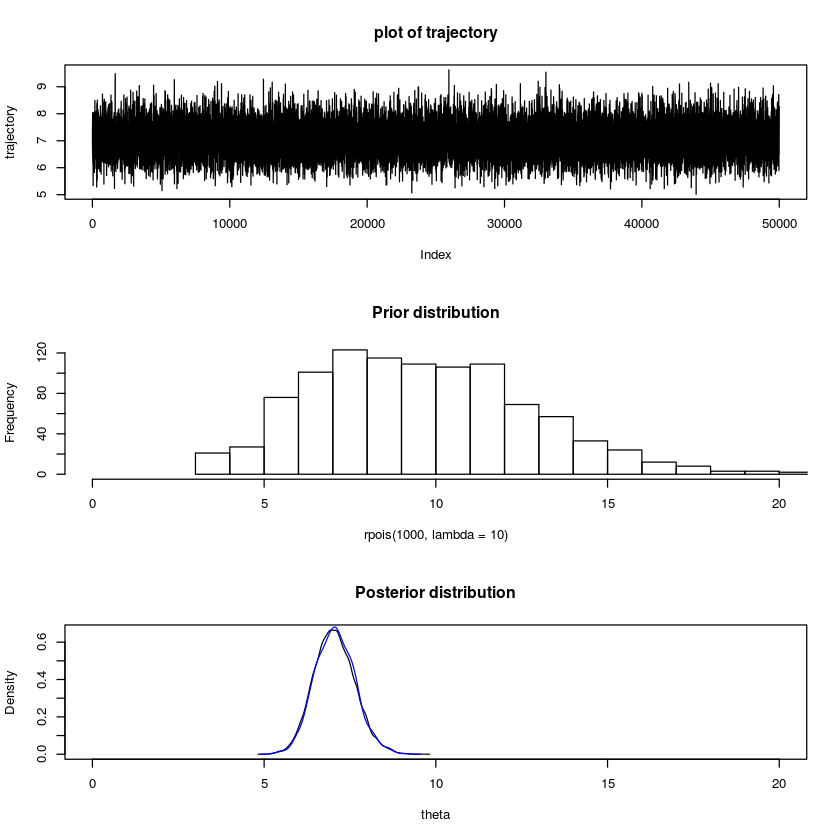

In [3]:
#Data가 poisson분포를 따를 때, posterior를 만드는 Metropolis - algorithm.

#Data is 'x'
x<-rpois(10,lambda=5) # 모수를 5로 가지는 포아송분포에서 데이터를 1000개 생성.
n<-length(x)
y<-sum(x)

#likelihood ~ exp(-n*theta)*theta^sum(x) 
#y의 likelihood와 multivariate x의 likelihood가 posterior를 동일하게 구성한다.
#B/C x ~ poi(theta), then y ~ poi(n*theta) where y = sum(x)

#prior, shape=100, rate=5 인 gamma dist
#Poisson을 likelihood로 갖는 conjugate prior gamma의 shape parameter와 rate parameter는 다음과 같이 생각할 수 있다. 
#rate -> 동일한 포아송분포를 독립적으로 따르는 샘플의 수
#shape parameter -> 그 샘플들의 합.

##### Generate posterior theta | sum(x)

#Prior
a<- 100  #shape parameter
b<- 10   #rate parameter
## a/b = 10을 모수로 갖으리라 생각되는 prior

#50000번 샘플을 생성해냄.
repeated<-50000
trajectory<-c()
trajectory[1]<-7  #초기값 지정.
proposed<-c()
currented<-c()

#Jump distribution의 표준편차 지정
sdd<-1

#algorithm
for(i in 1:repeated){
	del.theta<-rnorm(1,mean=0,sd=sdd)  #theta의 변화량
	currented<-trajectory[i] 	#현재위치
	proposed<-trajectory[i]+del.theta

	if(proposed<0){
		repeat{
			del.theta<-rnorm(1, mean=0, sd=sdd)  #theta의 변화량
			proposed<-trajectory[i]+del.theta 		#제안위치
			if(proposed>0) {break}
		}
	}

	r=min(1,(dgamma(proposed,shape=a,rate=b)*dpois(y,lambda=proposed*n))/(dgamma(currented,shape=a,rate=b)*dpois(y,lambda=currented*n)))
	u<-runif(1)
	if(u<=r){
	trajectory[i+1]<-proposed
	} else{
	trajectory[i+1]<-currented
	}
}

**trajectory plot** : theta의 여정을 나타낸 플롯입니다. 특정 바운드로 굉장히 빠르게 수렴한 것을 볼 수 있습니다.

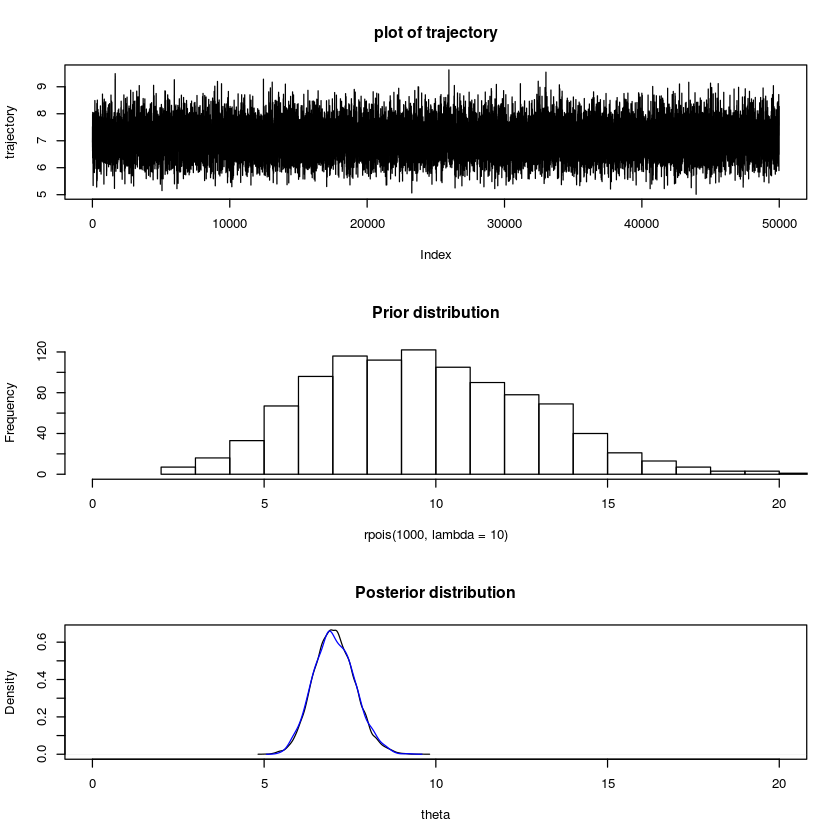

In [6]:
par(mfrow=c(3,1))
#Trajectory plot
plot(trajectory,type='l',main="plot of trajectory")
#prior
hist(rpois(1000,lambda=10),xlim=c(0,20),breaks=20,main="Prior distribution")
#posterior
plot(density(trajectory[10000:50000]),xlab="theta",main="Posterior distribution"
,xlim=c(0,20)) #posterior
lines(density(rgamma(1000,shape=a+y,rate=n+b)),col='blue')  #theoretical posterior 

* postrior에 2개 색깔이 있는데요, 검은색이 MH알고리즘을 이용해서 만들어낸 분포이고, 파란색은 Gamma분포가 공액분포인 점을 이용해서 구한 이론적인 사후분포입니다. 두 개의 분포가 거의 같은 것을 확인할 수 있습니다!

In [5]:
summary(trajectory)
quantile(trajectory[10000:50000],c(0.025,0.975))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.017   6.643   7.037   7.053   7.447   9.625 

2.5%    97.5% 
5.933428 8.262139

## MH알고리즘 이외에도 확률분포를 만들어 내는 여러 분포들이 있습니다. 

- Monte Carlo Marcov Chain(MH의 아주 단순한 형태)

- 깁스 샘플링

- 등